In [60]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)

In [61]:
data_2021 <- read_csv("https://raw.githubusercontent.com/juliasangster/STAT_201_Project/main/crimedata_csv_AllNeighbourhoods_2021.csv")
data_2020 <- read_csv("https://raw.githubusercontent.com/juliasangster/STAT_201_Project/main/crimedata_csv_AllNeighbourhoods_2020.csv")
data_2019 <- read_csv("https://raw.githubusercontent.com/juliasangster/STAT_201_Project/main/crimedata_csv_AllNeighbourhoods_2019.csv")
data_2018 <- read_csv("https://raw.githubusercontent.com/juliasangster/STAT_201_Project/main/crimedata_csv_AllNeighbourhoods_2018.csv")


Rows: 32185 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 37519 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 48159 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification fo

In [62]:
all_data <- rbind(data_2021, data_2020, data_2019, data_2018)
all_data <- all_data |>
    select(TYPE, YEAR, MONTH, DAY, NEIGHBOURHOOD)

In [63]:
all_data$TYPE <- as.factor(all_data$TYPE)

levels(all_data$TYPE)

[1] "Break and Enter Commercial"                            
 [2] "Break and Enter Residential/Other"                     
 [3] "Homicide"                                              
 [4] "Mischief"                                              
 [5] "Offence Against a Person"                              
 [6] "Other Theft"                                           
 [7] "Theft from Vehicle"                                    
 [8] "Theft of Bicycle"                                      
 [9] "Theft of Vehicle"                                      
[10] "Vehicle Collision or Pedestrian Struck (with Fatality)"
[11] "Vehicle Collision or Pedestrian Struck (with Injury)"

`summarise()` has grouped output by 'TYPE'. You can override using the
`.groups` argument.


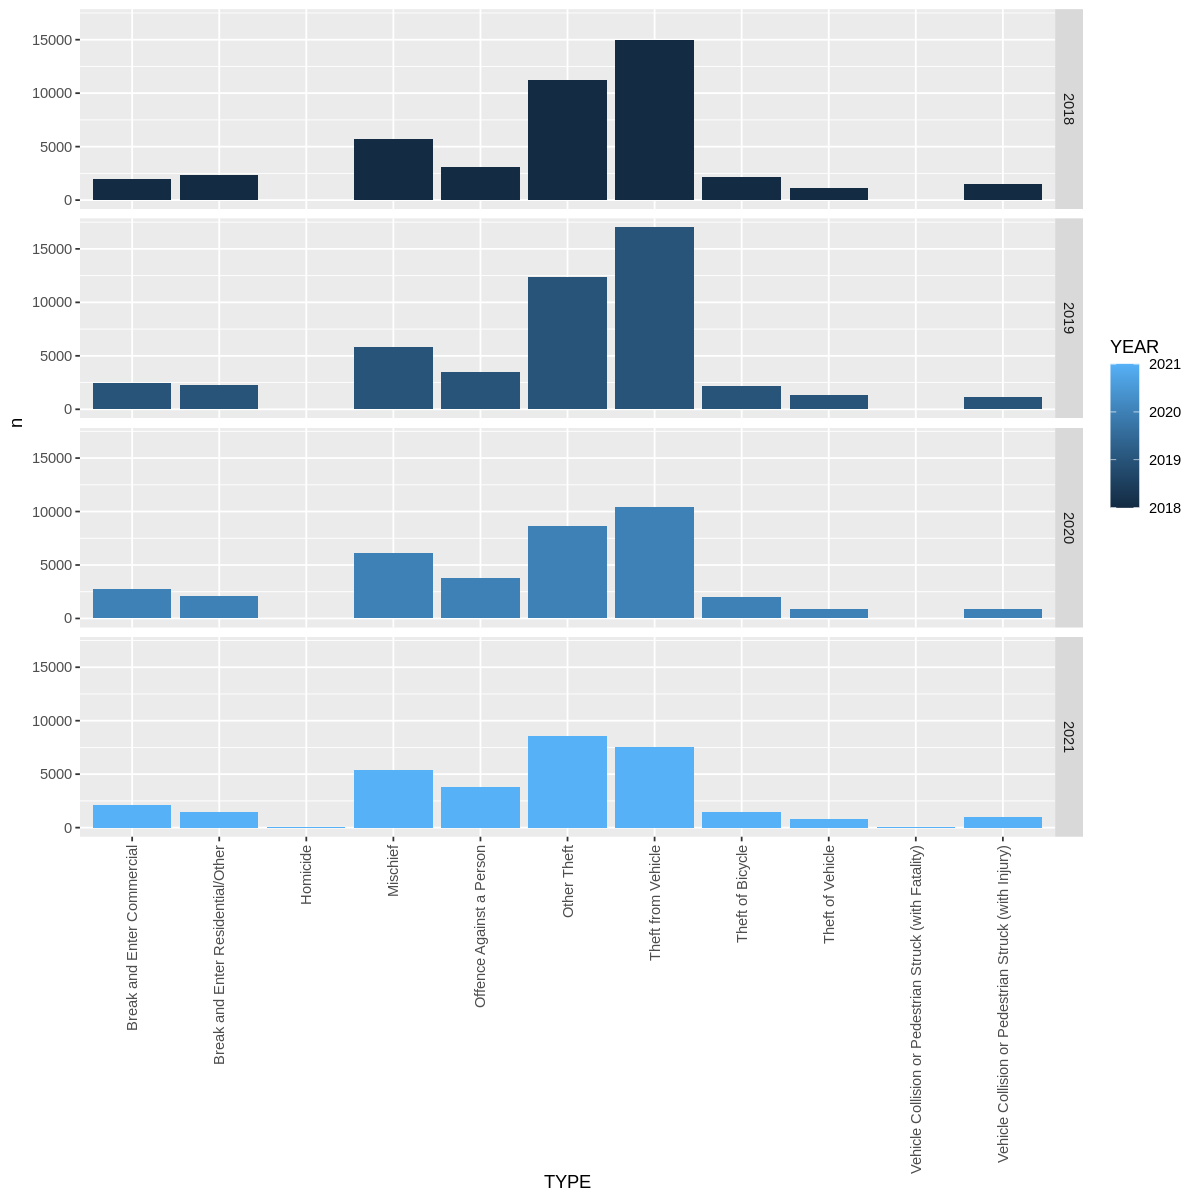

In [64]:
plot_data_1 <- all_data |>
    group_by(TYPE, YEAR) |>
    summarize(n = n()) |>
    ungroup()

options(repr.plot.width = 10, repr.plot.height = 10) 
plot_1 <- plot_data_1 |>
    ggplot() +
    geom_bar(aes(x=TYPE, y = n, fill = YEAR), stat = "identity") +
    facet_grid(rows = vars(YEAR)) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
    
plot_1

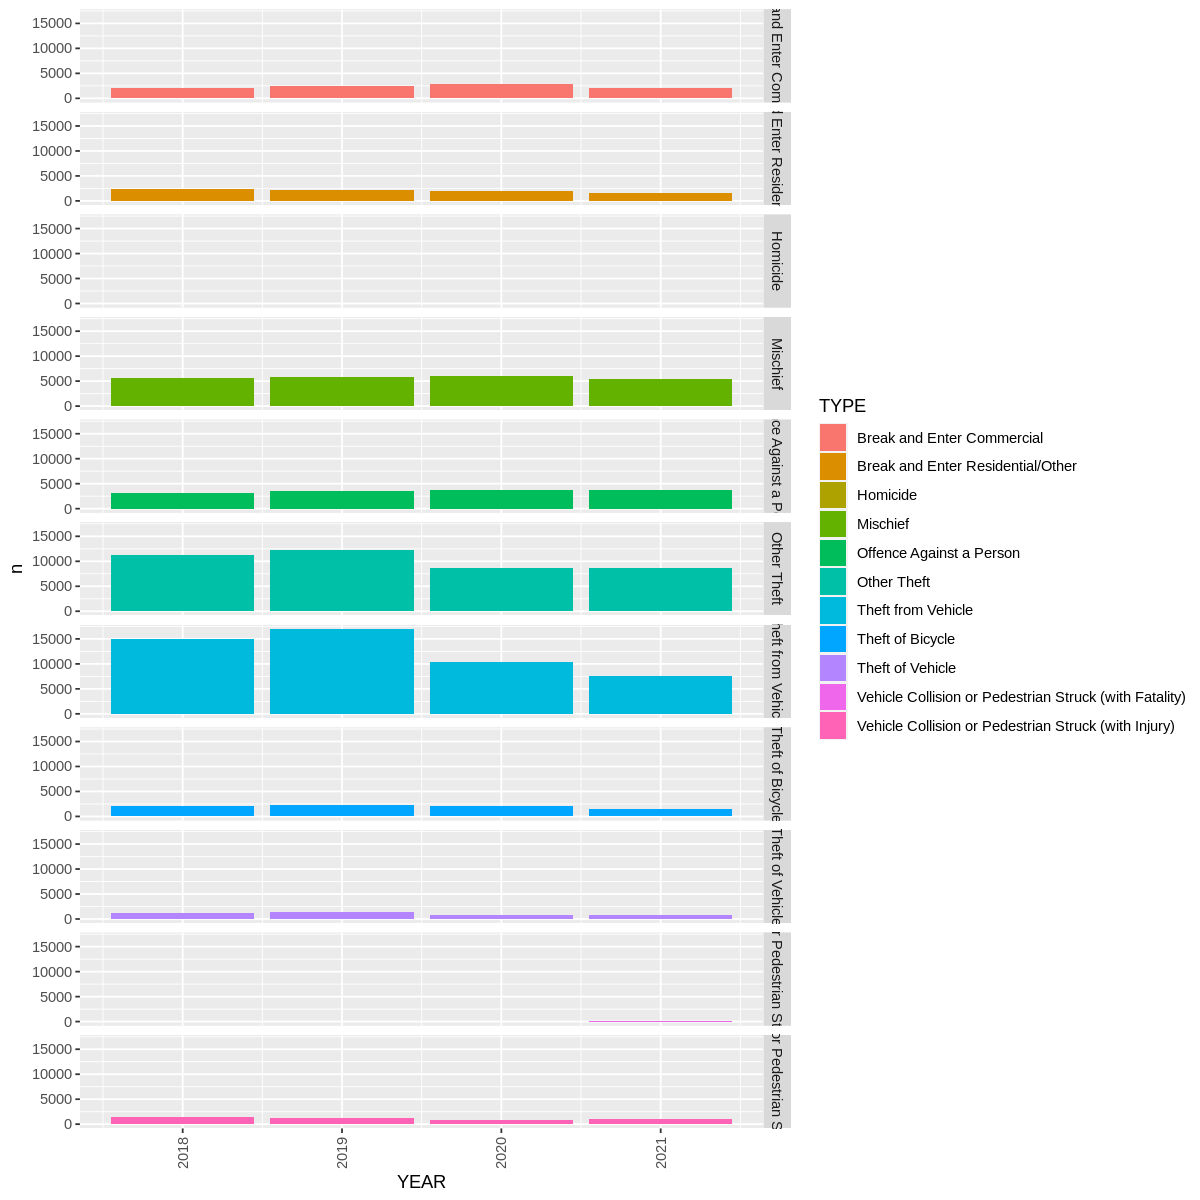

In [65]:
plot_2 <- plot_data_1 |>
    ggplot() +
    geom_bar(aes(x=YEAR, y = n, fill = TYPE), stat = "identity") +
    facet_grid(rows = vars(TYPE)) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
    
plot_2

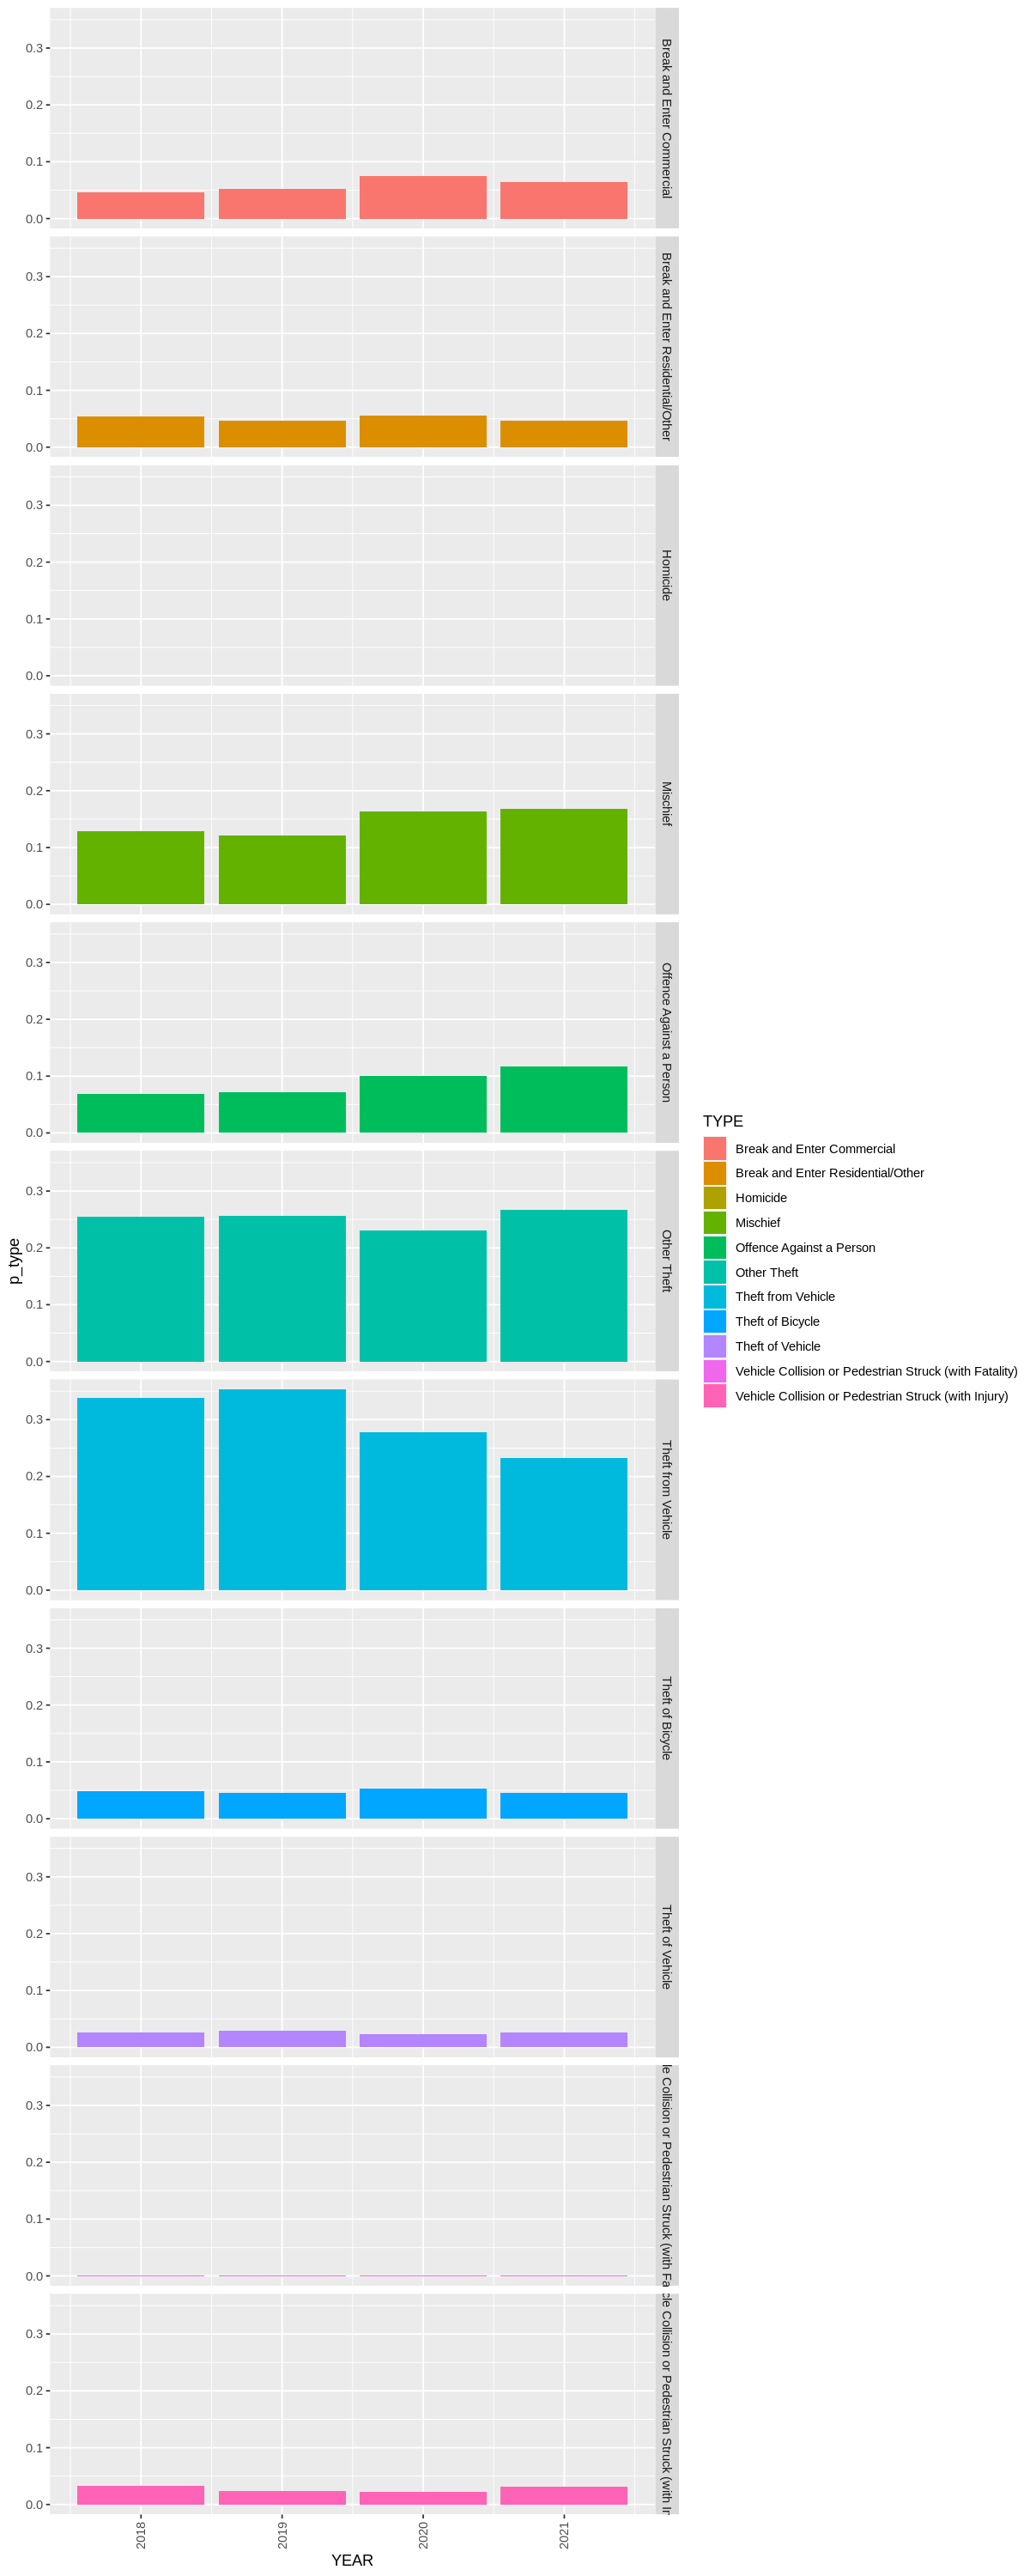

In [66]:
total_crime_per_year <- all_data |>
    group_by(YEAR) |>
    summarize(n = n())

total_crime_2018 <- 44252
total_crime_2019 <- 48159
total_crime_2020 <- 37519
total_crime_2021 <- 32185

p_crimes_2018 <- all_data |>
    filter(YEAR == 2018) |>
    group_by(TYPE) |>
    summarize(n = n(),
              p_type = n/total_crime_2018,
              YEAR = 2018)

p_crimes_2019 <- all_data |>
    filter(YEAR == 2019) |>
    group_by(TYPE) |>
    summarize(n = n(),
              p_type = n/total_crime_2019,
              YEAR = 2019)

p_crimes_2020 <- all_data |>
    filter(YEAR == 2020) |>
    group_by(TYPE) |>
    summarize(n = n(),
              p_type = n/total_crime_2020,
              YEAR = 2020)

p_crimes_2021 <- all_data |>
    filter(YEAR == 2021) |>
    group_by(TYPE) |>
    summarize(n = n(),
              p_type = n/total_crime_2021,
              YEAR = 2021)

p_crimes_all <- rbind(p_crimes_2018, p_crimes_2019, p_crimes_2020, p_crimes_2021)

options(repr.plot.width = 10, repr.plot.height = 25) 

plot_3 <- p_crimes_all |>
    ggplot() +
    geom_bar(aes(x=YEAR, y = p_type, fill = TYPE), stat = "identity") +
    facet_grid(rows = vars(TYPE)) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

plot_3

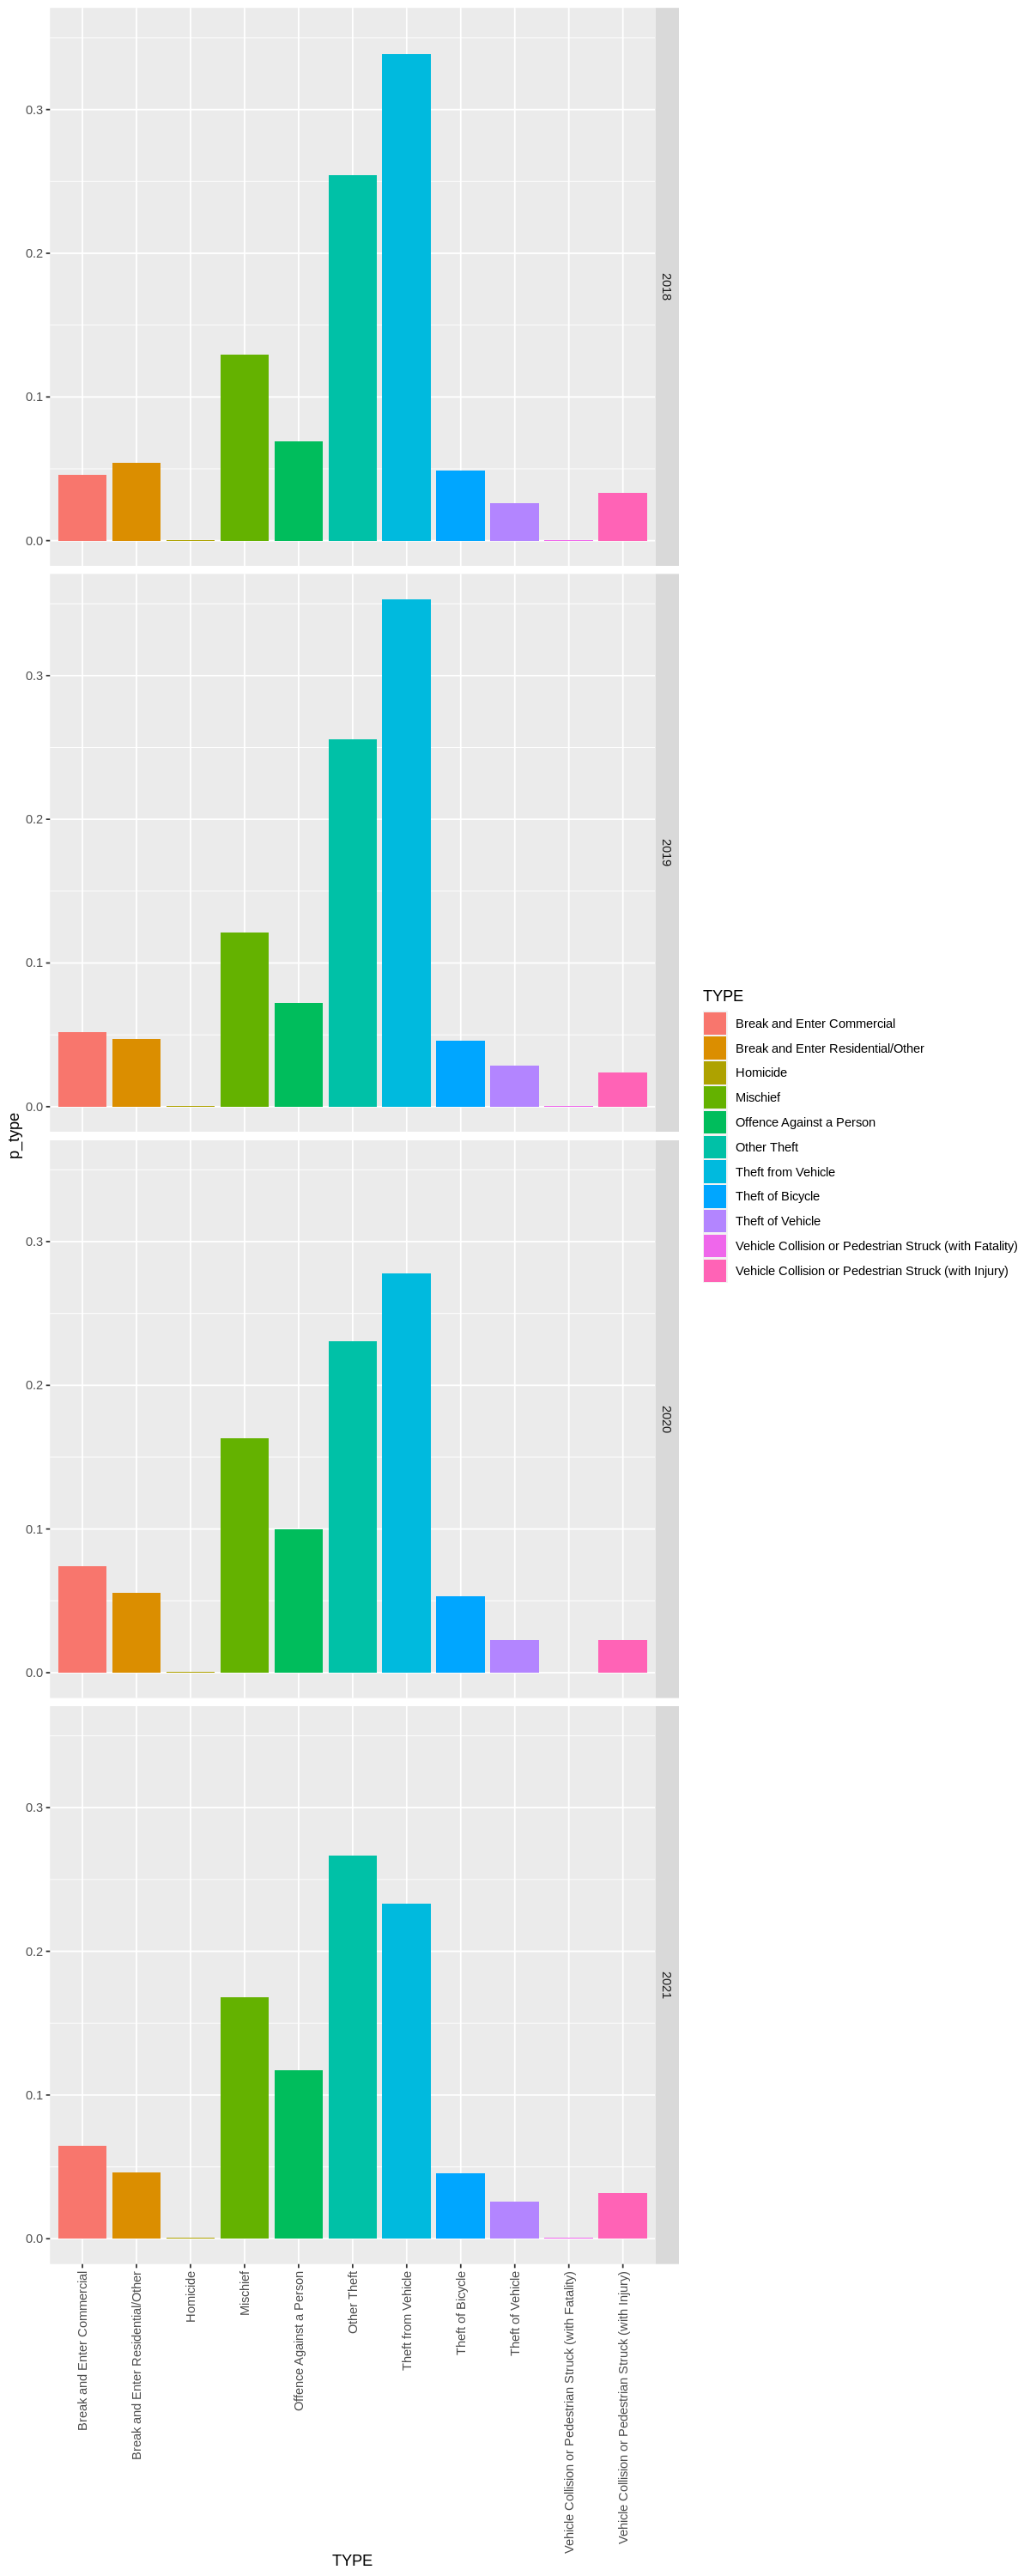

In [67]:
options(repr.plot.width = 10, repr.plot.height = 25) 

plot_4 <- p_crimes_all |>
    ggplot() +
    geom_bar(aes(x=TYPE, y = p_type, fill = TYPE), stat = "identity") +
    facet_grid(rows = vars(YEAR)) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

plot_4